 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nekotokurasu11/ai-implementation-test/blob/master/question1-10.ipynb)
### 下準備
import

In [2]:
!pip install --user numpy matplotlib opencv-python sklearn scikit-image --upgrade

Requirement already up-to-date: numpy in /Users/sabe/.local/lib/python3.7/site-packages (1.19.1)
Requirement already up-to-date: matplotlib in /Users/sabe/.local/lib/python3.7/site-packages (3.3.0)
Requirement already up-to-date: opencv-python in /Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.7/site-packages (4.3.0.36)
Requirement already up-to-date: sklearn in /Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.7/site-packages (0.0)
Requirement already up-to-date: scikit-image in /Users/sabe/.local/lib/python3.7/site-packages (0.17.2)
You should consider upgrading via the '/Users/sabe/.pyenv/versions/anaconda3-5.2.0/bin/python -m pip install --upgrade pip' command.


### Q.1. チャネル入れ替え
画像を読み込み、RGBをBGRの順に入れ替えよ

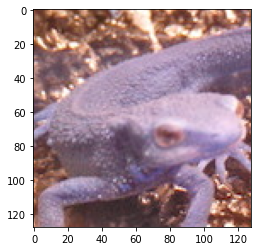

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("../assets/imori.jpg")
plt.imshow(img)
plt.show()

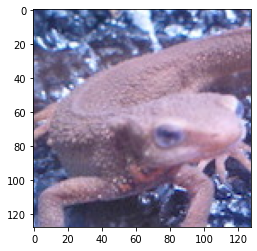

In [7]:
bgr_img = img[:, :, ::-1].copy()
plt.imshow(bgr_img)
plt.show()

In [8]:
# pltだとRGBで読み込むので微妙だが
# 画像本体についてはmg[:, :, ::-1]でBGR→RGBをしている(関数にすると以下)
def BGR2RGB(img):
    return img[:,:,::-1].copy()

In [1]:
result_img = BGR2RGB(img)

# save result
cv2.imwrite("out.jpg", result_img)
# 以下、jupter notebookだと落ちる
# cv2.imshow("result", result_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

NameError: name 'BGR2RGB' is not defined

### Q2.グレースケール化
画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。  
Y = 0.2126 R + 0.7152 G + 0.0722 B

In [33]:
def BGR2GRAY(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()
    result = 0.2126*r + 0.7152*g + 0.0722*b
    # 型変換（回答見てできていなかったところ）
    result = result.astype(np.uint8)
    return result

In [37]:
# 画像の読み込み
img = cv2.imread("../assets/imori.jpg").astype(np.float)

result_img2 = BGR2GRAY(img)
cv2.imwrite("result_img2.jpg", result_img2)
# imshowはカラーで表示させるもの
# plt.imshow(result_img2)
# plt.gray()
# plt.show()

True

### Q.3.二値化
画像を二値化せよ。二値化とは、画像を黒と白の二値で表現する方法である。ここでは、グレースケールにおいて閾値を128に設定し、下式で二値化する。

In [45]:
def GRAY2BINARY(gray_img):
    
    x, y = gray_img.shape
    result = gray_img.copy()
    
    for i in range(x):
        for j in range(y):
            if gray_img[i,j] < 128:
                result[i,j] = 0
            else:
                result[i,j]=255
    
    return result        

In [34]:
def binarization(img, th=128):
    # そういえばこういった書き方あった。
    img[img < th] = 0
    img[img >= th] = 255
    return img

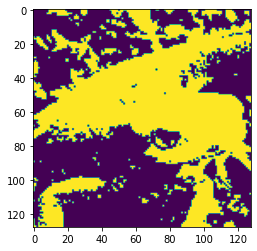

In [35]:
# 画像の読み込み
img = cv2.imread("../assets/imori.jpg").astype(np.float)
# グレイスケール
gray_img = BGR2GRAY(img)
#　二値化
# binary_img = GRAY2BINARY(gray_img)
binary_img = binarization(gray_img)

plt.imshow(binary_img)
plt.show()

### Q.4. 大津の二値化
大津の二値化を実装せよ。大津の二値化とは判別分析法と呼ばれ、  
`二値化における分離の閾値を自動決定する手法である。`  
**これはクラス内分散**と**クラス間分散**の比から計算される。（急に難しくなった感）

グレースケールの輝度値（ピクセルの値）のヒストグラムは以下のようになる。

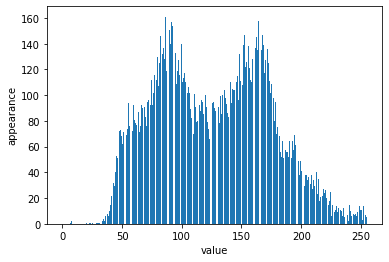

In [49]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../assets/imori.jpg')
gray = 0.2126 * img[..., 2] + 0.7152*img[..., 1] + 0.0722*img[..., 0]
plt.hist(gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.xlabel('value')
plt.ylabel('appearance')
plt.show()

二値化はある値を境界にして、0か1にする方法。  
大津の二値化は閾値を自動的に決定する方法である。  
ここでは閾値によって分離される画素をそれぞれクラス0,1とする。

ある閾値tによって、クラス0と1がうまく分離できれば良い二値化と言える。  
と言うことで、クラス0と1の分離度を定義する。

$\omega_0, \omega_1$…クラス0,1に属する画素数  
$\sigma_0, \sigma_1$ …クラス0,1に属する画素値の分散  
$M_0, M_1$ …クラス0,1に属する画素値の平均値  
$M_l$…画像全体の画素値の平均値  
$P_0,P_1$…クラス0,1に属する画素値の合計値  
とすると、  
クラス0,1の分散の重み付き和を示す**クラス内分散**は次式となる。  
$$\sigma_w^2 = w_0\sigma_0^2+w_1\sigma_1^2$$
クラス0,1の平均値が画像全体n平均からどれだけ離れているかを示すクラス間分散は次式となる。  
$$\sigma_b^2=(導出過程)= \frac{\omega_0\omega_1}{(\omega_0+\omega_1)^2}(M_0-M_1)^2$$
※導出過程が長くてとばしている。  
分散の度合いが**クラス内分散が小さく、かつクラス間分散が大きく**なるように定義される。（クラス分類と同様の考え方）  
$$X = \frac{\sigma_b^2}{\sigma_w^2}$$
画像全体の画素の分散はクラス内分散とクラス間分散の和となる。  
$$\sigma_l^2 = \sigma_w^2 +  \sigma_b^2$$
よって分離度Xは次式で定義される。  
$$X=\frac{\sigma_b^2}{\sigma_w^2}=\frac{\sigma_b^2}{\sigma_l^2-\sigma_b^2}$$
この分離度が最大となれば良い、つまりクラス間分散が最大になれば良い。  
$$argmax_tX=argmax_t\sigma_b^2$$
つまり、閾値を0~255の各値でクラス間分散を計算し、最大になる閾値が最適な閾値である。

In [28]:
import numpy as np

def get_threshold(img):
    result = 1
    siguma = 0
    for th in range(255):
        #　クラス0に属する画素数
        w0 = np.count_nonzero(img[img<th])
        #　クラス1に属する画素数
        w1 = np.count_nonzero(img[img>=th])
        #　クラス0に属する画素数
        M0 = np.sum(img[img<th]) / w0
        #　クラス1に属する画素数
        M1 = np.sum(img[img>=th]) /w1
        if not np.isnan(w0) and not np.isnan(w1) and not np.isnan(M0) and not np.isnan(M1):
            temp = (w0*w1/(w0+w1)**2)*((M0-M1)**2)
            if siguma <= temp:
                siguma = temp
                result = th
    return result

127


/Users/sabe/.pyenv/versions/anaconda3-5.2.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


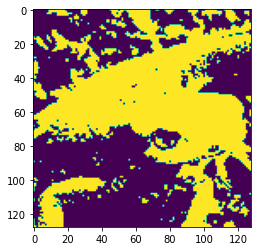

In [32]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../assets/imori.jpg').astype(np.float)
# グレイスケール
gray_img = BGR2GRAY(img)
th = get_threshold(gray_img)
print(th)
binary_img = binarization(gray_img, th)
plt.imshow(binary_img)
plt.show()

In [49]:
#回答バージョン
def otsu_binarization(img):
    max_sigma = 0
    max_t = 0
    H, W = img.shape
    # determine threshold
    for _t in range(1, 256):
        v0 = img[np.where(img < _t)]
        m0 = np.mean(v0) if len(v0) > 0 else 0.
        w0 = len(v0) / (H*W)
        v1 = img[np.where(img >= _t)]
        m1 = np.mean(v1) if len(v1) > 0 else 0.
        w1 = len(v1) / (H*W)
        sigma = w0 * w1 * ((m0 - m1) ** 2)
        if sigma > max_sigma:
            max_sigma =sigma
            max_t = _t
            
    return max_t

In [50]:
# グレイスケール
gray_img = BGR2GRAY(img)
print(otsu_binarization(gray_img))

127
